## Step 2: Explorative Data Analysis

In [1]:
%store -r df

### Univariate Analysis

#### Taxi Demand per Month

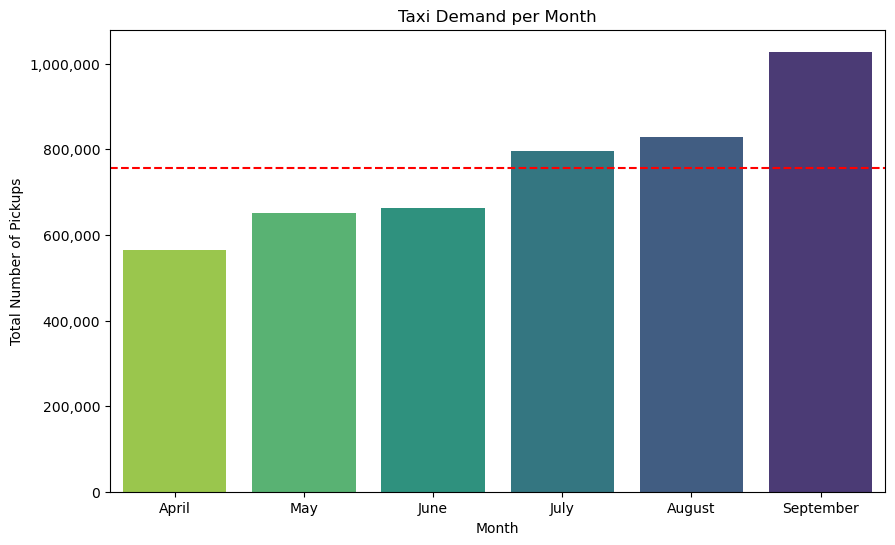

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Define the order of months
month_order = ['April', 'May', 'June', 'July', 'August', 'September']

# Calculate demand per month
month_demand = df.groupby('Month_Name').size()

# Reorder month_demand based on month_order
month_demand = month_demand.reindex(month_order)

# Calculate average demand per month
avg_month_demand = month_demand.mean()

plt.figure(figsize=(10, 6))

# Define color palette and apply it based on rank
color_palette = sns.color_palette("viridis", len(month_demand))
rank = month_demand.argsort().argsort()

# Plot the bar plot with specified color palette and order of months
sns.barplot(x=month_order, y=month_demand, palette=np.array(color_palette[::-1])[rank])

# Set the x-tick labels
plt.xlabel('Month')
plt.ylabel('Total Number of Pickups')

# Format y-axis labels
formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Plot the horizontal line for the average pickups over all months
plt.axhline(y=avg_month_demand, color='red', linestyle='--', label='Overall Average')

plt.title('Taxi Demand per Month')
plt.show()

#### Taxi Demand per Hour

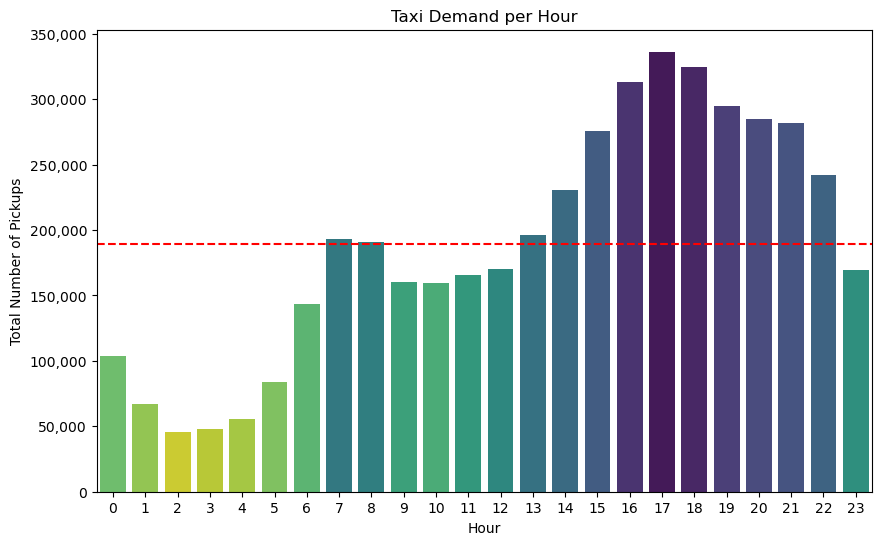

In [3]:
# Calculate demand per hour
hourly_demand = df.groupby('Hour').size()

# Calculate average demand per hour
avg_hourly_demand = hourly_demand.mean()

plt.figure(figsize=(10,6))

# Define color palette and apply it based on rank
color = sns.color_palette("viridis", len(hourly_demand))
rank = hourly_demand.argsort().argsort()
sns.barplot(x=hourly_demand.index, y=hourly_demand, palette=np.array(color[::-1])[rank])

# Plot the horizontal line for the average hourly pickups
plt.axhline(y=avg_hourly_demand, color='red', linestyle='--', label='Overall Average')

# Format y-axis labels
formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Taxi Demand per Hour')
plt.ylabel('Total Number of Pickups')
plt.show()


#### Taxi Demand per Weekday

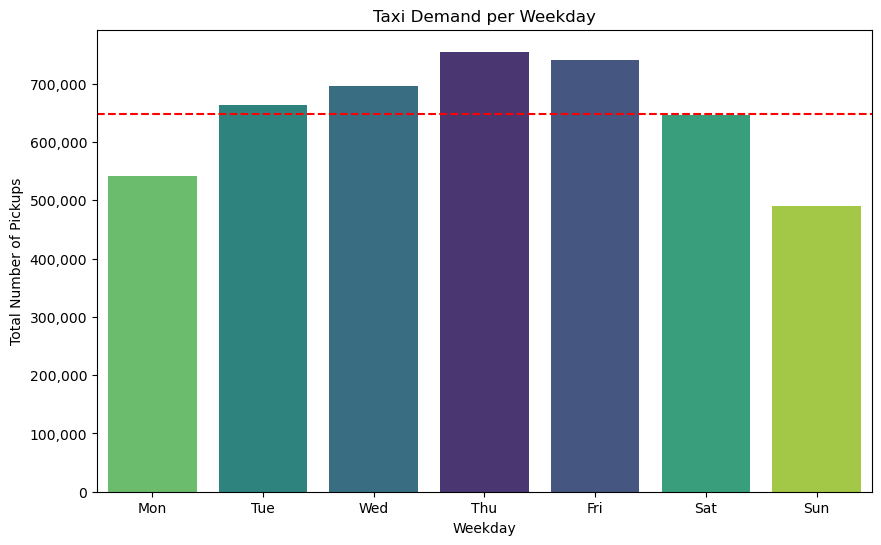

In [4]:
# Define the order of weekdays
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Calculate demand per weekday
weekday_demand = df.groupby('Weekday_Name').size()

# Reorder weekday_demand based on weekday_order
weekday_demand = weekday_demand.reindex(weekday_order)

# Calculate average demand per weekday
avg_weekday_demand = weekday_demand.mean()

plt.figure(figsize=(10, 6))

# Define color palette and apply it based on rank
color_palette = sns.color_palette("viridis", len(weekday_demand))
rank = weekday_demand.argsort().argsort()

# Plot the bar plot with specified color palette and order of weekdays
sns.barplot(x=weekday_order, y=weekday_demand, palette=np.array(color_palette[::-1])[rank])

# Set the x-tick labels to Weekday_Name
plt.xlabel('Weekday')
plt.ylabel('Total Number of Pickups')

# Plot the horizontal line for the average pickups over all months
plt.axhline(y=avg_weekday_demand, color='red', linestyle='--', label='Overall Average')

# Format y-axis labels
formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Taxi Demand per Weekday')
plt.show()


#### Taxi Demand per Cluster

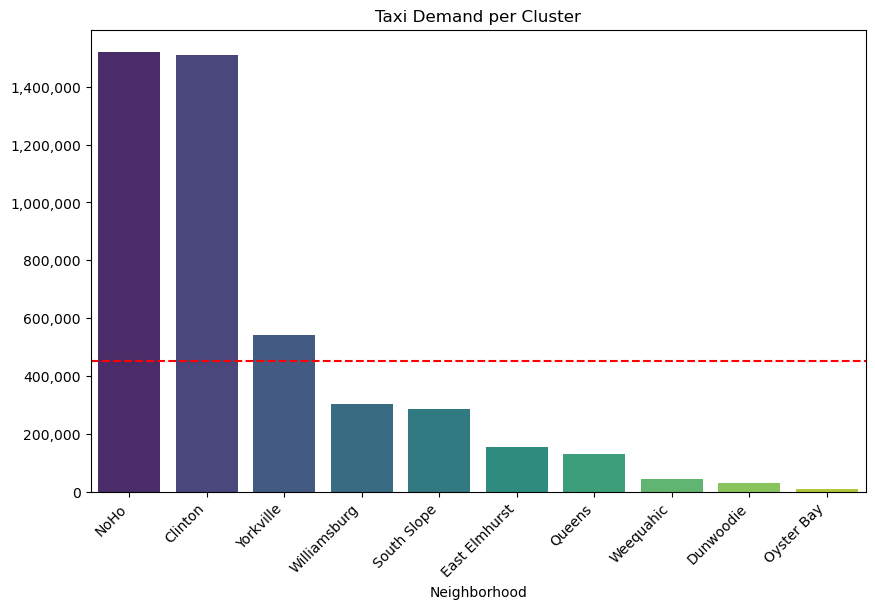

In [5]:
cluster_demand = df.groupby('Neighborhood').size().sort_values(ascending=False)

# Calculate average demand per cluster
avg_cluster_demand = cluster_demand.mean()

plt.figure(figsize=(10,6))
sns.barplot(x=cluster_demand.index, y=cluster_demand, palette='viridis')

# Plot the vertical line for the average pickups over all bases
plt.axhline(y=avg_cluster_demand, color='red', linestyle='--', label='Overall Average')

# Format y-axis labels
formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Taxi Demand per Cluster')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

#### Taxi Demand per Base

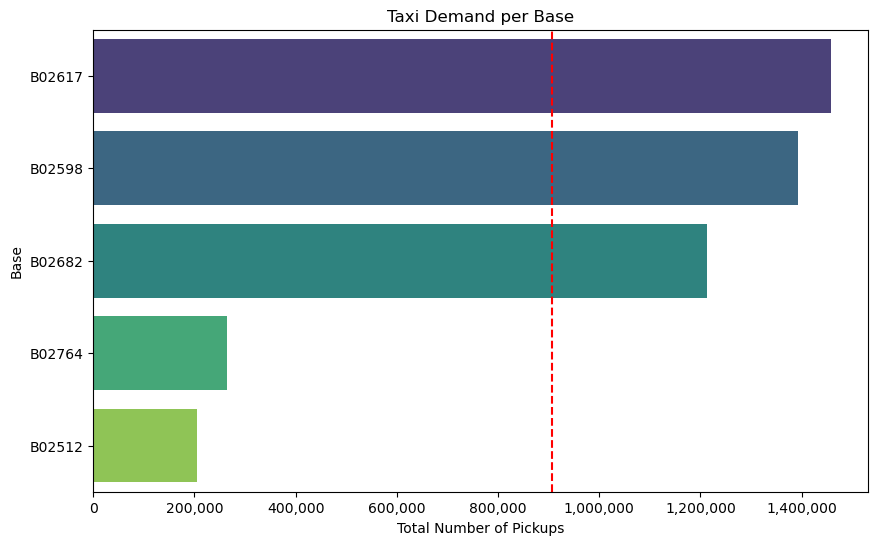

In [6]:
# Base-wise Demand
base_demand = df.groupby('Base').size().sort_values(ascending=False)

avg_base_demand = base_demand.mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=base_demand.values, y=base_demand.index, palette='viridis')

# Plot the vertical line for the average pickups over all bases
plt.axvline(x=avg_base_demand, color='red', linestyle='--', label='Overall Average')

plt.title('Taxi Demand per Base')
plt.xlabel('Total Number of Pickups')
plt.ylabel('Base')

# Format x-axis labels
formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

### Bivariate Analysis

#### Average Hourly Demand per Cluster

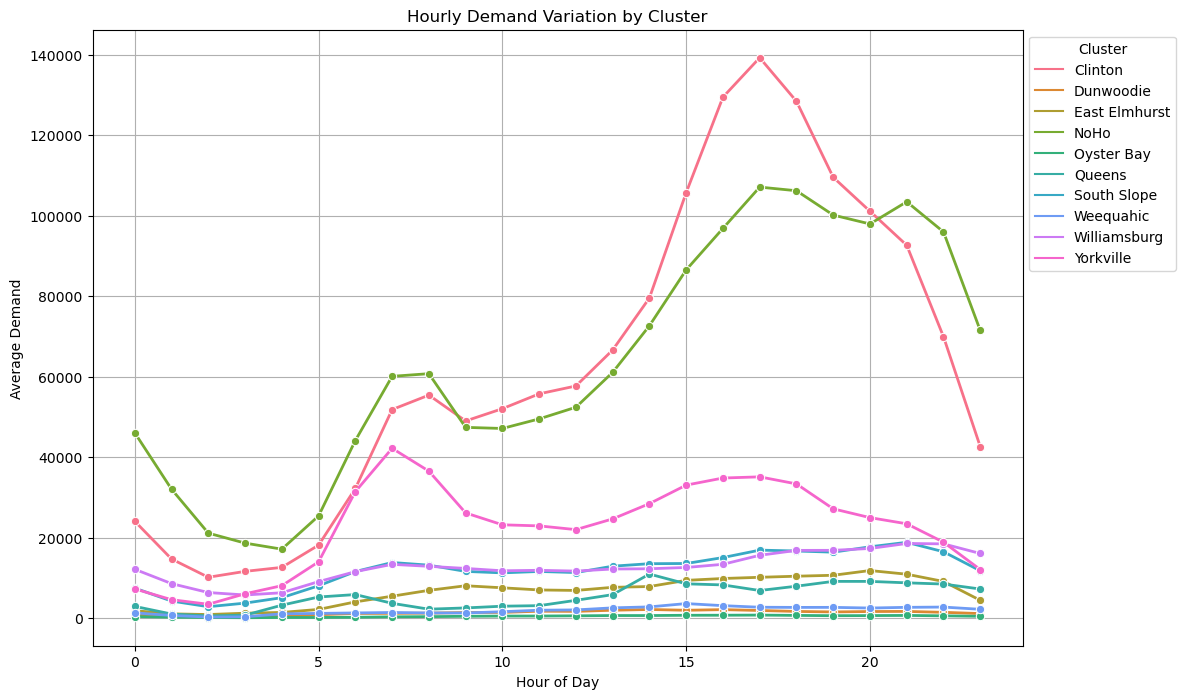

In [7]:
import pandas as pd

# Define the order of weekdays
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Group data by 'Cluster' and 'Hour', then calculate the average demand
cluster_hourly_demand = df.groupby(['Neighborhood', 'Hour']).size().reset_index(name='Demand')

# Sort the DataFrame by both "Postcode" and "Hour"
cluster_hourly_demand = cluster_hourly_demand.sort_values(by=['Neighborhood', 'Hour'])

# Group data by 'Postcode' and 'Weekday', then calculate the average demand
cluster_daily_demand = df.groupby(['Neighborhood', 'Weekday_Name']).size().reset_index(name='Demand')

# Sort the DataFrame by "Postcode" and custom sort order for weekdays
cluster_daily_demand['Weekday_Name'] = pd.Categorical(cluster_daily_demand['Weekday_Name'], categories=weekday_order, ordered=True)
cluster_daily_demand = cluster_daily_demand.sort_values(by=['Neighborhood', 'Weekday_Name'])

# Define a custom color palette with unique colors for each postcode
custom_palette = sns.color_palette("husl", n_colors=len(cluster_daily_demand['Neighborhood'].unique()))

# Plotting Hourly Demand Variation by Cluster
plt.figure(figsize=(12, 8))
sns.lineplot(data=cluster_hourly_demand, x='Hour', y='Demand', hue='Neighborhood', marker='o', linewidth=2, palette=custom_palette)
plt.title('Hourly Demand Variation by Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Average Demand')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


#### Average Daily Taxi Demand per Cluster

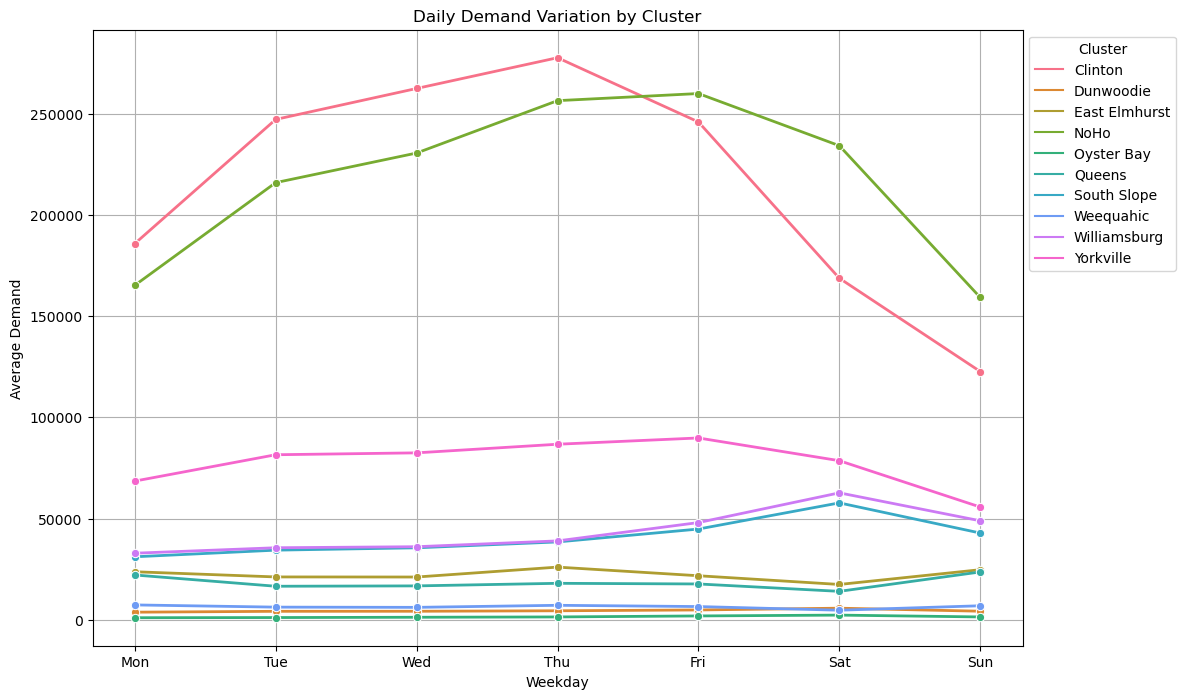

In [8]:
# Plotting Daily Demand Variation by Cluster
plt.figure(figsize=(12, 8))
sns.lineplot(data=cluster_daily_demand, x='Weekday_Name', y='Demand', hue='Neighborhood', marker='o', linewidth=2, palette=custom_palette)
plt.title('Daily Demand Variation by Cluster')
plt.xlabel('Weekday')
plt.ylabel('Average Demand')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#### Taxi Demand per Hour Category and Month

<Figure size 1200x800 with 0 Axes>

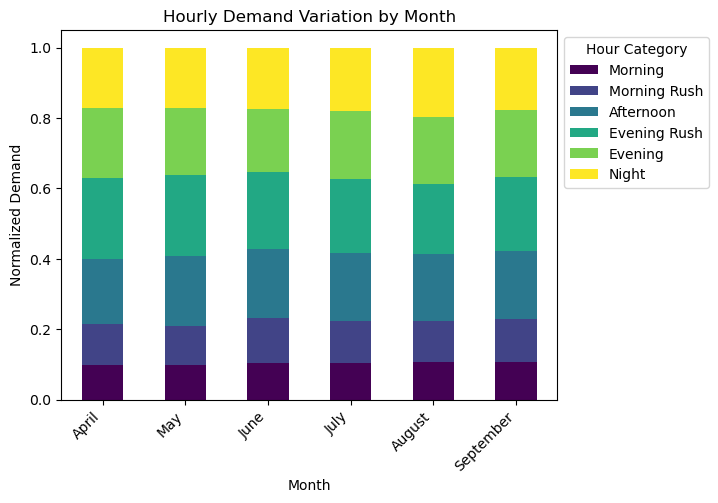

In [9]:
# Convert 'Month_Name' to ordered categorical variable with the specified order
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

# Group data by 'Month' and 'Hour_Category', then calculate the count
monthly_hourly_demand = df.groupby(['Month_Name', 'Hour_Category']).size().reset_index(name='Demand')

# Pivot the DataFrame to have 'Hour_Category' as columns
monthly_hourly_demand_pivot = monthly_hourly_demand.pivot(index='Month_Name', columns='Hour_Category', values='Demand')

# Normalize the values by dividing each value by the sum of values for that month
monthly_hourly_demand_pivot_normalized = monthly_hourly_demand_pivot.div(monthly_hourly_demand_pivot.sum(axis=1), axis=0)

# Reorder the columns based on the desired order of Hour Categories
hour_category_order = ['Morning', 'Morning Rush', 'Afternoon', 'Evening Rush', 'Evening', 'Night']
monthly_hourly_demand_pivot_normalized = monthly_hourly_demand_pivot_normalized.reindex(columns=hour_category_order)

# Plotting
plt.figure(figsize=(12, 8))
monthly_hourly_demand_pivot_normalized.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Hourly Demand Variation by Month')
plt.xlabel('Month')
plt.ylabel('Normalized Demand')
plt.legend(title='Hour Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()


### Temporal Analysis

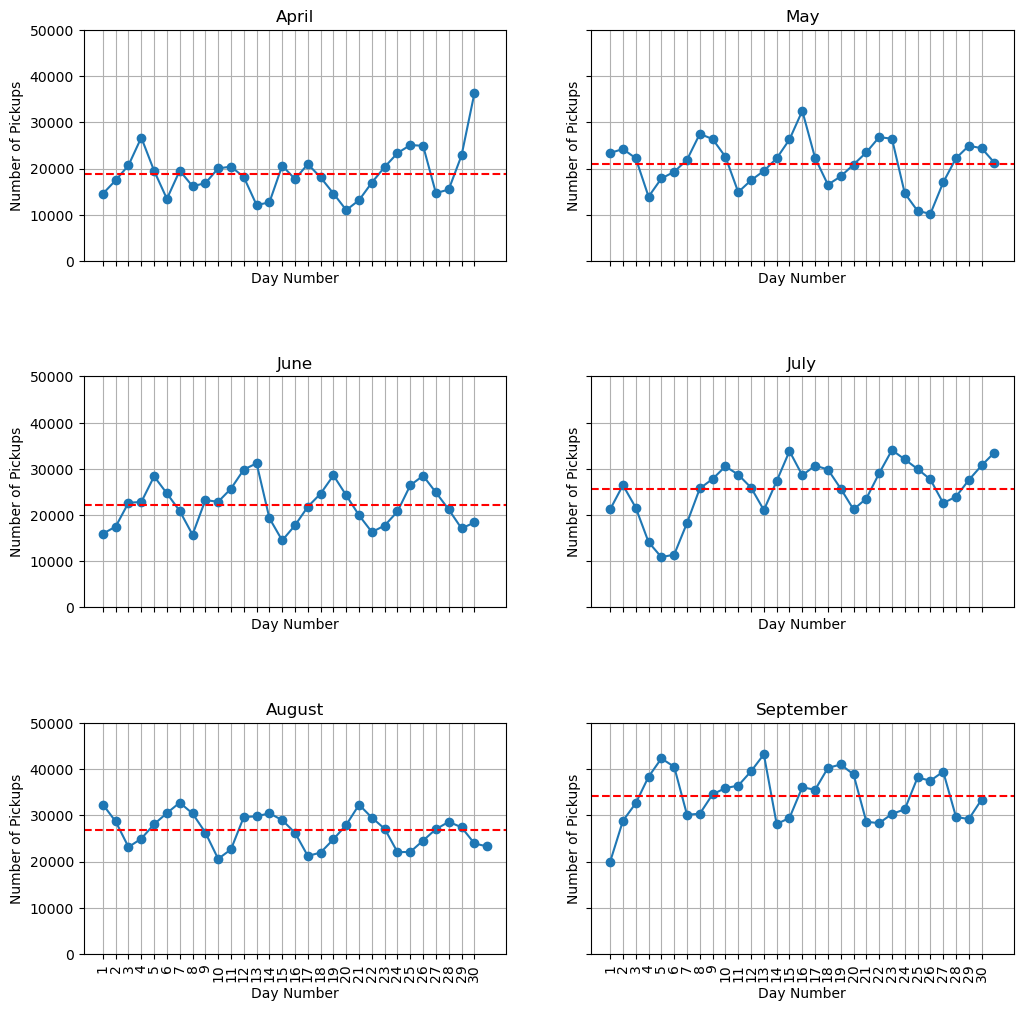

In [10]:
# Sort the DataFrame by the 'Month_Number' column
df = df.sort_values(by='Month')

# Get the unique sorted month names
month_names = df['Month_Name'].unique()

# Get the number of months and calculate the number of rows and columns needed
num_months = len(month_names)
num_rows = num_months // 2
num_cols = 2

# Create subplots with increased vertical spacing
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12), sharey=True, sharex=True, gridspec_kw={'hspace': 0.5})

y_axis_limit = (0, 50000)

# Convert Date/Time column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

for idx, month in enumerate(month_names):
    # Calculate the row and column indices for the current subplot
    row = idx // num_cols
    col = idx % num_cols
    
    # Filter data for pickups that occurred in each month
    monthly_pickups = df[df['Month_Name'] == month]

    # Group data by date and count the number of pickups for each day
    daily_pickups_counts = monthly_pickups.groupby(monthly_pickups['Day_Number']).size()
    
    
    # Calculate mean pickup count for the month
    avg_monthly_pickups = daily_pickups_counts.mean()

    # Plot the data on the current subplot
    ax = axs[row, col]
    ax.plot(daily_pickups_counts.index, daily_pickups_counts.values, label=month, marker='o')
   
    
    # Plot the average pickup count as a horizontal line
    ax.axhline(y=avg_monthly_pickups, color='red', linestyle='--', label='Average Pickups')
    ax.set_title(month)
    ax.set_xlabel("Day Number")
    ax.set_ylabel("Number of Pickups")
    ax.set_xticks(daily_pickups_counts.index)
    ax.set_xticklabels(daily_pickups_counts.index, rotation=90)
    ax.grid(True)
    
    # Set the y-axis limit
    ax.set_ylim(y_axis_limit)
    
# Adjust layout and display the plot
plt.show()

### Geospatial Analysis

#### Visualization of the Cluster Centroids

In [13]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# Calculate the centroid of each cluster
cluster_centers = df.groupby('Cluster').agg({'Lat': 'mean', 'Lon': 'mean'}).reset_index()

# Initialize the map centered around the mean latitude and longitude
cluster_centers_map = folium.Map(location=[df['Lat'].mean(), df['Lon'].mean()], zoom_start=10)

# Define the number of clusters
num_clusters = cluster_centers.shape[0]

# Generate colors from a colormap 
colormap = colors.ListedColormap(cm.viridis(np.linspace(0, 1, num_clusters)))

# Add markers for each cluster center with corresponding colors
for index, row in cluster_centers.iterrows():
    color_index = int(row['Cluster'])  # Ensure the cluster ID is an integer
    color = colors.rgb2hex(colormap.colors[color_index])
    folium.Marker(location=[row['Lat'], row['Lon']],
                  popup=f'Cluster {row["Cluster"]}',
                  icon=folium.Icon(color='white', icon_color=color)).add_to(cluster_centers_map)

# Display the map
cluster_centers_map


#### Visualization of Pickups

In [14]:
# Sample 5% of the DataFrame for plotting
sampled_df = df.sample(frac=0.05)

# Initialize the map centered around the mean latitude and longitude
pickups_map = folium.Map(location=[sampled_df['Lat'].mean(), sampled_df['Lon'].mean()], zoom_start=10)

# Calculate the number of unique clusters
num_clusters = sampled_df['Cluster'].nunique()

# Generate colors from the Viridis colormap
colormap = colors.ListedColormap(cm.viridis(np.linspace(0, 1, num_clusters)))

# Add markers for each pickup location, colored by cluster
for index, row in sampled_df.iterrows():
    cluster_color = colormap(row['Cluster'] / num_clusters)  # Normalize cluster number
    hex_color = colors.rgb2hex(cluster_color)
    folium.CircleMarker(location=[row['Lat'], row['Lon']], 
                        radius=5, 
                        color=hex_color, 
                        fill=True, 
                        fill_color=hex_color).add_to(pickups_map)

# Display the map
pickups_map